Распределение Пуассона 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


lambda_expected_value = 5  


def sample_mean_convergence():
    sample_sizes = [10, 20, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
    means = []

    for size in sample_sizes:
        sample = np.random.poisson(lambda_expected_value, size)
        means.append(np.mean(sample))

    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, means, marker='o', label='Выборочное среднее')
    plt.axhline(y=lambda_expected_value, color='r', linestyle='-.', label='Математическое ожидание')
    plt.title('Сходимость выборочного среднего к математическому ожиданию')
    plt.xlabel('Размер выборки')
    plt.ylabel('Выборочное среднее')
    plt.legend()
    plt.grid()
    plt.show()

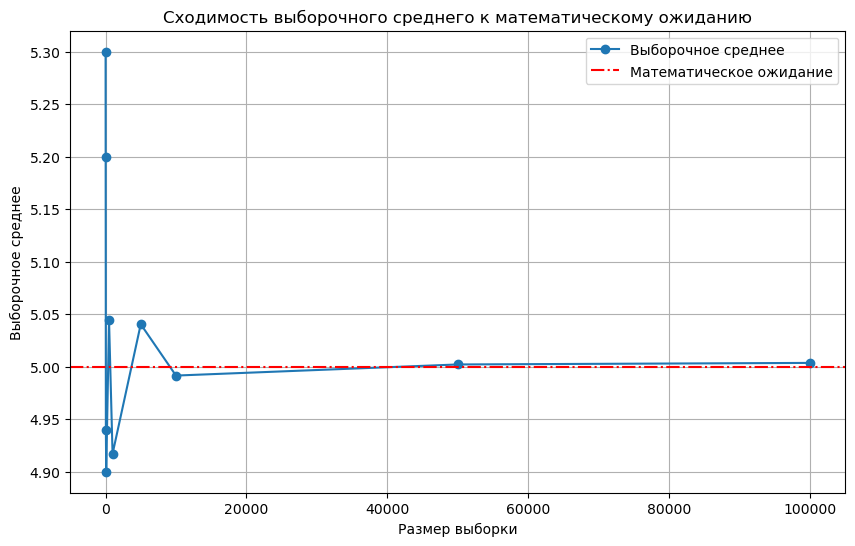

In [16]:
sample_mean_convergence()

Сходимость выборочного среднего к математическому ожиданию. В результате эксперимента с генерацией выборок по пуассоновскому распределению наблюдается, что с увеличением размера выборки вырочное среднее стабилизируется и приближается к математическому ожиданию, которое в свою очередь равно 5. Это подтвержает закон больших чисел, согласно которому среднее значение выборки стремится к теорическому мат ожиданию при увеличении размера выборки. 

In [31]:
def central_limit_theorem():
    sample_size = 100
    num_samples = 1000  
    sample_sums = [np.sum(np.random.poisson(lambda_expected_value, sample_size)) for _ in range(num_samples)]
    sample_sums_normalization = (np.array(sample_sums) - sample_size * lambda_expected_value) / np.sqrt(sample_size * lambda_expected_value)

    plt.figure(figsize=(10, 6))
    sns.histplot(sample_sums_normalization, kde=True, stat="density", bins=25, label='Нормализованные суммы выборок')
    x = np.linspace(-4, 4, 1000)
    plt.plot(x, 1 / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2), label='Нормальное распределение', color='r')
    plt.title('Центральная предельная теорема')
    plt.xlabel('Нормализованное значение')
    plt.ylabel('Плотность вероятности')
    plt.legend()
    plt.grid()
    plt.show()


c:\Users\Katie\miniconda3\envs\mltest\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


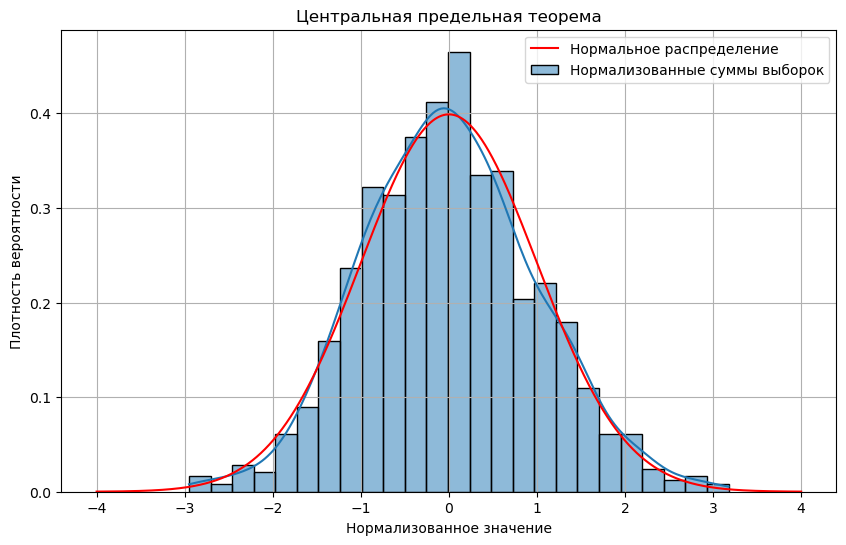

In [32]:
central_limit_theorem()

Центральная предельная теорема. 

Согласно центральной предельной теореме, сумма выборок из распределения с фиксированным математическим ожиданием и дисперсией будет стремиться к нормальному распределению при увеличении числа выборок. Для выбранного пуассоновского распределения с параметром λ = 5, построенная гистограмма нормализованных сумм выборок показывает сходимость распределения к нормальному при увеличении числа выборок. Это демонстрирует практическое применение ЦПТ и объясняет, почему сумма выборок пуассоновского распределения с большим числом наблюдений имеет форму нормального распределения.

Доверительные интервалы

In [34]:
import pandas as pd
from scipy.stats import t

In [35]:
def generate_samples():
    small_sample = np.random.poisson(lambda_expected_value, 20)
    medium_sample = np.random.poisson(lambda_expected_value, 500)
    large_sample = np.random.poisson(lambda_expected_value, 10000)
    return small_sample, medium_sample, large_sample


In [93]:
def asymptotic_cpt(sample, confidence=0.95):
    n = len(sample)
    mean = np.mean(sample)
    std_error = np.std(sample, ddof=1) / np.sqrt(n)
    z = t.ppf((1 + confidence) / 2, df=n-1)
    return round(mean - z * std_error,3), round(mean + z * std_error, 3)

In [94]:
def exact_cpt(sample, confidence=0.95):
    return asymptotic_cpt(sample, confidence)

In [95]:
def bootstrap_cpt(sample, stat_function, confidence=0.95, n_bootstrap=1000):
    bootstrap_samples = np.random.choice(sample, (n_bootstrap, len(sample)), replace=True)
    stat_values = np.apply_along_axis(stat_function, 1, bootstrap_samples)
    lower = np.percentile(stat_values, (1-confidence)/2 * 100)
    upper = np.percentile(stat_values, (1+confidence)/2 * 100)
    return round(lower, 3), round(upper, 3)

In [96]:
def summarize_intervals(sample, sample_name):
    mean_asymptotic = asymptotic_cpt(sample)
    mean_exact = exact_cpt(sample)
    mean_bootstrap = bootstrap_cpt(sample, np.mean)
    median_bootstrap = bootstrap_cpt(sample, np.median)
    mode_bootstrap = bootstrap_cpt(sample, lambda x: np.bincount(x).argmax())
    variance_bootstrap = bootstrap_cpt(sample, np.var)

    return {
        "Sample": sample_name,
        "Asymptotic CPT (Mean)": mean_asymptotic,
        "Exact CPT (Mean)": mean_exact,
        "Bootstrap CPT (Mean)": mean_bootstrap,
        "Bootstrap CPT (Median)": median_bootstrap,
        "Bootstrap CPT (Mode)": mode_bootstrap,
        "Bootstrap CPT (Variance)": variance_bootstrap
    }


In [97]:
small_sample, medium_sample, large_sample = generate_samples()

In [98]:
intervals = [
    summarize_intervals(small_sample, "Small"),
    summarize_intervals(medium_sample, "Medium"),
    summarize_intervals(large_sample, "Large")
]

In [99]:
intervals_df = pd.DataFrame(intervals)
intervals_df 


,Sample,Asymptotic CPT (Mean),Exact CPT (Mean),Bootstrap CPT (Mean),Bootstrap CPT (Median),Bootstrap CPT (Mode),Bootstrap CPT (Variance)
0,Small,"(3.086, 5.614)","(3.086, 5.614)","(3.15, 5.551)","(2.5, 6.0)","(1.0, 8.0)","(3.74, 9.347)"
1,Medium,"(4.698, 5.086)","(4.698, 5.086)","(4.706, 5.082)","(4.0, 5.0)","(4.0, 5.0)","(4.33, 5.426)"
2,Large,"(4.975, 5.062)","(4.975, 5.062)","(4.972, 5.061)","(5.0, 5.0)","(4.0, 5.0)","(4.844, 5.105)"


Доверительные интервалы

В ходе работы были рассчитаны доверительные интервалы для среднего значения для выборок малого, среднего и большого размеров с использованием трех методов: асимптотического, точного и бутстрэп-методов. Результаты показывают следующее:
-Асимптотический доверительный интервал для среднего с использованием ЦПТ дает стабильные результаты с увеличением размера выборки, но для малых выборок интервалы могут быть слишком широкими.
-Точный доверительный интервал на основе t-распределения также показывает схожие результаты с асимптотическим методом, однако этот метод более точен для малых выборок.
-Бутстрэп-методы показывают точность оценок среднего, медианы, моды и дисперсии для выборок разных размеров. Бутстрэп-интервалы становятся более узкими с увеличением размера выборки, что подтверждает высокую точность оценок для больших выборок.
Также хочется отметить, что ширина доверительных интервалов уменьшается с ростом объема выборки. 
